# Machine Learning models

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix    
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

In [2]:
def calculate_eval_measure(model,features,target):
    y_pred = model.predict(features)
    tn, fp, fn, tp = confusion_matrix(y_pred,target).ravel()
    print('TP: {}, TN: {}'.format(tp,tn))
    print('FP: {}, FN: {}'.format(fp,fn))
    print(f"Model Accuracy : {accuracy_score(y_pred,target)*100:.2f}%")
    print(f"Model F1-Score : {f1_score(y_pred,target)*100:.2f}%")
    print(f"Model Precision : {precision_score(y_pred,target)*100:.2f}%")
    print(f"Model recall : {recall_score(y_pred,target)*100:.2f}%")

In [3]:
def create_fi_plot(model):
    
    if type(model)!=CatBoostClassifier:
        features = model.feature_names_in_
    else:
        features = model.feature_names_
        
    importances = model.feature_importances_
        
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()    

In [4]:
df = pd.read_parquet('../data/processed/bank_data_prepro.parquet')
df.head()

,age,education,default,balance,housing,loan,month,campaign,pdays,y,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,type_set
0,53.0,3.0,0.0,1313.0,0.0,0.0,8.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,train
1,28.0,3.0,0.0,386.0,0.0,0.0,5.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,train
2,28.0,3.0,0.0,730.0,1.0,0.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,train
3,47.0,2.0,0.0,1265.0,1.0,1.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,train
4,32.0,3.0,0.0,1882.0,0.0,0.0,8.0,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,train


In [5]:
select_fns = ['age', 'education', 'default', 'balance', 'housing', 'loan',
       'month', 'campaign', 'pdays', 'pdays_cat', 'previous']+['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed']

In [6]:
df = df[select_fns+['y','type_set']]

In [7]:
list(df)

['age',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'month',
 'campaign',
 'pdays',
 'pdays_cat',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'y',
 'type_set']

In [8]:
categorical_features = ['education',
 'default','housing',
 'loan',
 'month','pdays_cat',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed']

In [9]:
df[categorical_features] = df[categorical_features].astype('int')

In [10]:
X_train,y_train = df[df.type_set=='train'].drop(['y','type_set'],axis=1), df[df.type_set=='train'].y
X_test,y_test = df[df.type_set=='test'].drop(['y','type_set'],axis=1), df[df.type_set=='test'].y
X_val,y_val = df[df.type_set=='val'].drop(['y','type_set'],axis=1), df[df.type_set=='val'].y

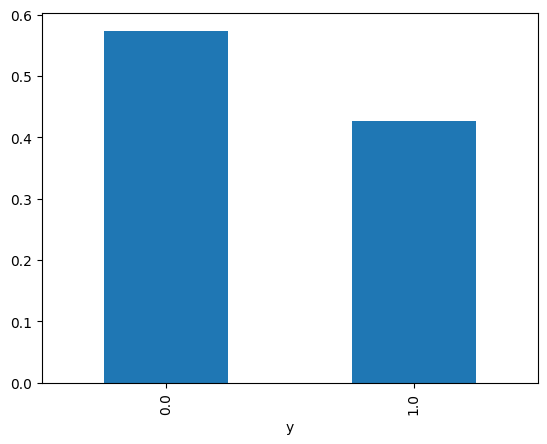

In [11]:
y_train.value_counts(normalize=True).plot.bar()
plt.show()

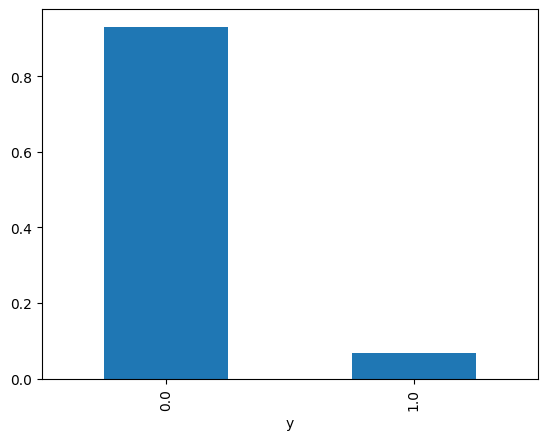

In [12]:
y_test.value_counts(normalize=True).plot.bar()
plt.show()

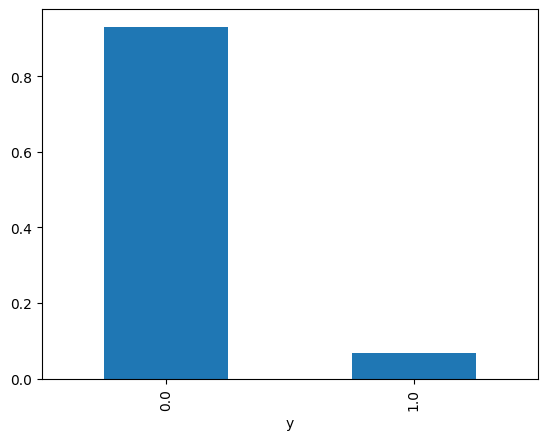

In [13]:
y_val.value_counts(normalize=True).plot.bar()
plt.show()

## Random Forest

Le variabili più importanti sono:
1. balance
2. age
3. month
4. campaign
5. pdays
6. education
7. housing
8. job (management)
9. loan
10. previous
11. pdays_cat
12. default

In [14]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 123)
#classifier.fit(X_train,y_train)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=123)

In [15]:
calculate_eval_measure(classifier,X_train,y_train)

TP: 1770, TN: 2485
FP: 83, FN: 10
Model Accuracy : 97.86%
Model F1-Score : 97.44%
Model Precision : 95.52%
Model recall : 99.44%


In [16]:
calculate_eval_measure(classifier,X_test,y_test)

TP: 285, TN: 6336
FP: 294, FN: 1462
Model Accuracy : 79.04%
Model F1-Score : 24.51%
Model Precision : 49.22%
Model recall : 16.31%


In [17]:
calculate_eval_measure(classifier,X_val,y_val)

TP: 220, TN: 5025
FP: 243, FN: 1214
Model Accuracy : 78.26%
Model F1-Score : 23.19%
Model Precision : 47.52%
Model recall : 15.34%


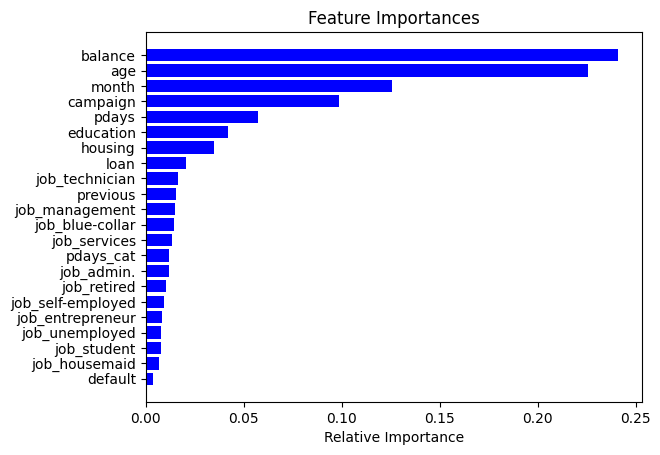

In [18]:
create_fi_plot(classifier)

## Catboost

In [19]:
from catboost import CatBoostClassifier

In [30]:
cb = CatBoostClassifier(
        iterations=3000,  # You can adjust the number of iterations based on your dataset and requirements
        cat_features=categorical_features,early_stopping_rounds=10,
        random_seed=42,  # For reproducibility
        #logging_level='Verbose',
        eval_metric='Precision'  # Set to 'Verbose' to see training progress
    )

In [31]:
cb.fit(X_train, y_train,verbose=False)

In [32]:
calculate_eval_measure(cb,X_train,y_train)

TP: 1110, TN: 2222
FP: 743, FN: 273
Model Accuracy : 76.63%
Model F1-Score : 68.60%
Model Precision : 59.90%
Model recall : 80.26%


In [33]:
calculate_eval_measure(cb,X_test,y_test)

TP: 318, TN: 6593
FP: 261, FN: 1205
Model Accuracy : 82.50%
Model F1-Score : 30.26%
Model Precision : 54.92%
Model recall : 20.88%


In [34]:
calculate_eval_measure(cb,X_val,y_val)

TP: 242, TN: 5249
FP: 221, FN: 990
Model Accuracy : 81.93%
Model F1-Score : 28.55%
Model Precision : 52.27%
Model recall : 19.64%


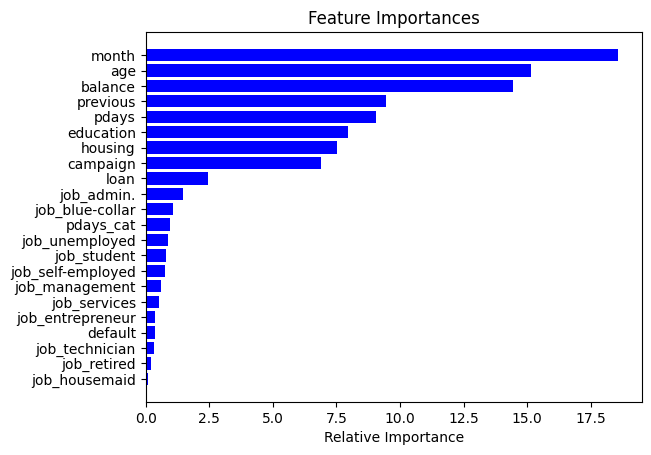

In [35]:
create_fi_plot(cb)